# Python Lesson 4 Practice Assignment

1. Create a list that contains the names of the days of the week. Using a `for` loop, print the days of the week.


In [1]:
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for day in days_of_week:
    print(day)

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday


2. Using a `for` loop and the `.iterrows` method, print the month abbreviation and average temperature in Mesa for each month in 1879 together on the same line. (Remember that the month abbreviation is now the index for the row.) To make the output clearer, print a header explaining what the columns are before you print the values.

In [47]:
climate_df_updated = pd.DataFrame({
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'ppt': [92.8, 19.1, 18.2, 0.0, 4.1, 0.0, 8.3, 41.8, 34.1, 2.5, 0.0, 7.6],
    'tavg': [12.1, 10.1, 11.8, 19.2, 25.0, 28.1, 32.4, 32.2, 28.2, 19.5, 14.5, 8.7]
}).set_index('month')

print("Month | Average Temperature (1879)")
for index, row in climate_df_updated.iterrows():
    print(f"{index} | {row['tavg']}")


Month | Average Temperature (1879)
Jan | 12.1
Feb | 10.1
Mar | 11.8
Apr | 19.2
May | 25.0
Jun | 28.1
Jul | 32.4
Aug | 32.2
Sep | 28.2
Oct | 19.5
Nov | 14.5
Dec | 8.7


3. **Calculating a mean using the procedural approach.** Create a variable called `sum` and set its value to zero. Create a `for` loop that steps through each month and adds the precipitation value for each month to the `sum` variable. Recall that

```
sum += number
```

is a shortcut for

```
sum = sum + number
```

After you add up all of the values, print the value of the average precipitation for all months of the year. (Don't worry about weighting the monthly values by the length of the month.)

In [54]:
sum_ppt = 0

# Using a for loop to step through each month and add the precipitation value to the sum variable
for index, row in climate_df_updated.iterrows():
    sum_ppt += row['ppt']

average_ppt = sum_ppt / len(climate_df_updated)

average_ppt


19.041666666666668

4. **Calculating a mean using the vectorized approach.** Because pandas is designed for vectorized operations, there is an easier way to find the average precipitation for all of the months. Simply append the `.mean()` method to the precipitation column of the DataFrame. (The mean method does not require any arguments.) Print the result. Is it the same as what you got using the `for` loop?

In [56]:
average_ppt_vectorized = climate_df_updated['ppt'].mean()

average_ppt_vectorized


19.041666666666664

5. Yale University has an awesome website known as "Is it chicken tenders day?".  The website is at <http://www.isitchickentendersday.com/> and you can read about it [here](https://yaledailynews.com/blog/2011/09/08/is-it-chicken-tenders-day-question-answered-in-new-website/).  Using the website, you can determine whether it is chicken tenders day (i.e. Thursday) in the Yale residential dining halls. The `date` object from the `datetime` module has a *method* that determines the day of the week as a number (0=Monday, 1=Tuesday, etc.).  It's `date.today().weekday()`. From the `datetime` module import the `date` object. Begin your script by printing the question "Is it chicken tenders day?". Then use `if` and `else` to print `yes` if it's chicken tenders day and`no` for any other day.

In [20]:
from datetime import date

print("Is it chicken tenders day?")

# Check if today is Thursday
if date.today().weekday() == 3:  # In Python's datetime module, Monday is 0 and Sunday is 6
    print("Yes")
else:
    print("No")

Is it chicken tenders day?
No


6. Create a list containing the names of the days of the week. Start with Monday and end with Sunday to match the numbering produced by the `.weekday()` method. Modify the program above by adding a line to tell the user what the day of the week is today. You can use the output of the `.weekday()` method as the index number when referring to your list.

In [22]:
from datetime import date

days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

current_day_number = date.today().weekday()

current_day_name = days_of_week[current_day_number]

# Print the question and the current day
print("Is it chicken tenders day?")
print("Today is", current_day_name)

# Check if today is Thursday
if current_day_number == 3:  # In Python's datetime module, Monday is 0 and Sunday is 6
    print("Yes")
else:
    print("No")

Is it chicken tenders day?
Today is Tuesday
No


7. Use an input statement to let the user enter a number as a string. In a `try:` code block, convert the entered string to a floating point number using `float()`. Follow the conversion statement with a statement that prints the number. In the `except:` code block, print a warning to the user that they didn't enter a number.

In [24]:
user_input = input("Please enter a number: ")

try:
    number = float(user_input)
    
    print("The number you entered is:", number)
except ValueError:
    # If the conversion fails, print a warning
    print("Warning: You didn't enter a number.")

The number you entered is: 6.0


8. Create a Pyplot scatterplot with average precipitation on the X axis and average temperature on the Y axis. Lable the axes appropriately, including the units (mm for precipitation and degrees C for temperature).

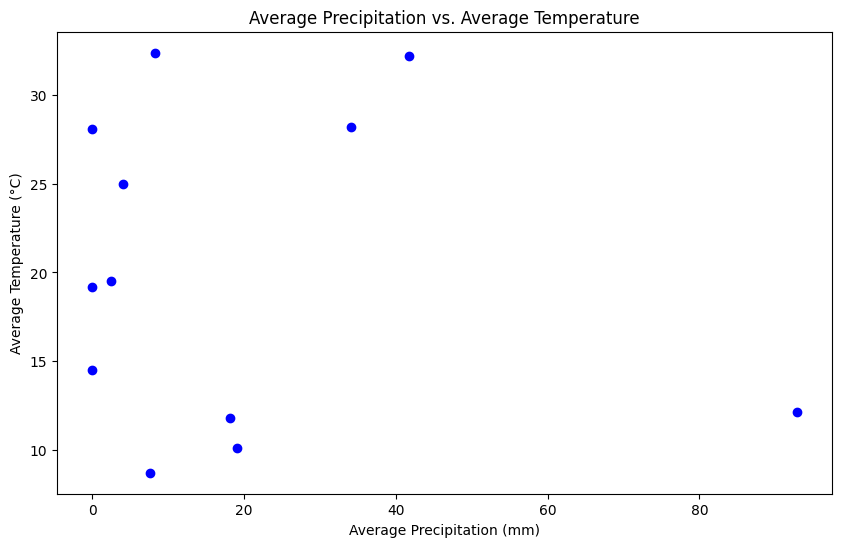

In [40]:
data = {
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'ppt': [92.8, 19.1, 18.2, 0.0, 4.1, 0.0, 8.3, 41.8, 34.1, 2.5, 0.0, 7.6],
    'tavg': [12.1, 10.1, 11.8, 19.2, 25.0, 28.1, 32.4, 32.2, 28.2, 19.5, 14.5, 8.7]
}
climate_df = pd.DataFrame(data)

# Creating the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(climate_df['ppt'], climate_df['tavg'], color='blue')

# Labeling the axes
plt.xlabel('Average Precipitation (mm)')
plt.ylabel('Average Temperature (°C)')

# Adding a title
plt.title('Average Precipitation vs. Average Temperature')

# Displaying the plot
plt.show()

9. Create another scatterplot using the same variables as above, but add a first order polynomial best fit line (trendline) to the graph. Make the scatterplot markers and trendline different colors and make sure your axes are labeled.

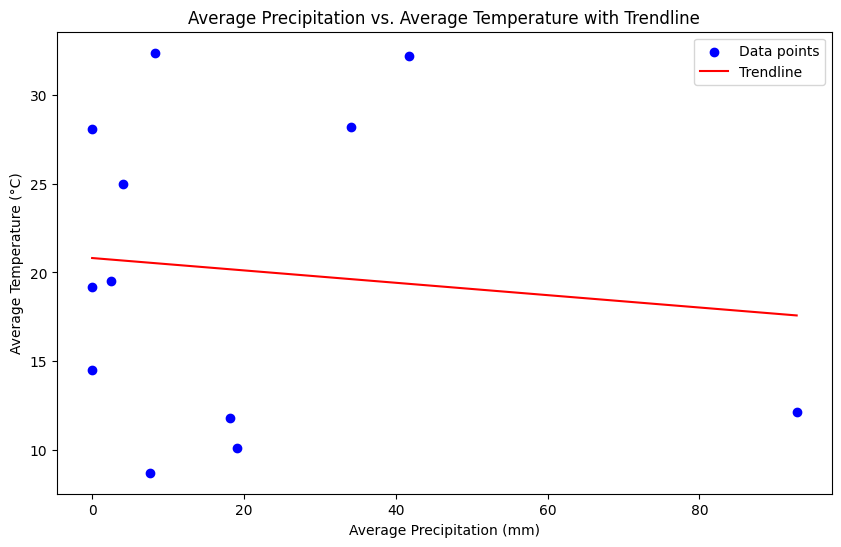

In [42]:
# Recalculating the coefficients of the first order polynomial (linear regression) for the new data
coefficients_new = np.polyfit(climate_df['ppt'], climate_df['tavg'], 1)
# Creating a new polynomial function using the coefficients
polynomial_new = np.poly1d(coefficients_new)
# Generating a new sequence of precipitation values for plotting the trendline
ppt_sequence_new = np.linspace(climate_df['ppt'].min(), climate_df['ppt'].max(), 100)
# Calculating temperature values for the trendline
tavg_trendline_new = polynomial_new(ppt_sequence_new)

# Creating the scatterplot with trendline
plt.figure(figsize=(10, 6))
plt.scatter(climate_df['ppt'], climate_df['tavg'], color='blue', label='Data points')
plt.plot(ppt_sequence_new, tavg_trendline_new, color='red', label='Trendline')

# Labeling the axes and adding a title
plt.xlabel('Average Precipitation (mm)')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Precipitation vs. Average Temperature with Trendline')
plt.legend()

# Displaying the plot
plt.show()

10. Create a bar chart with the month abbreviation on the X axis and the average precipitation on the Y axis. Label your axes appropriately.

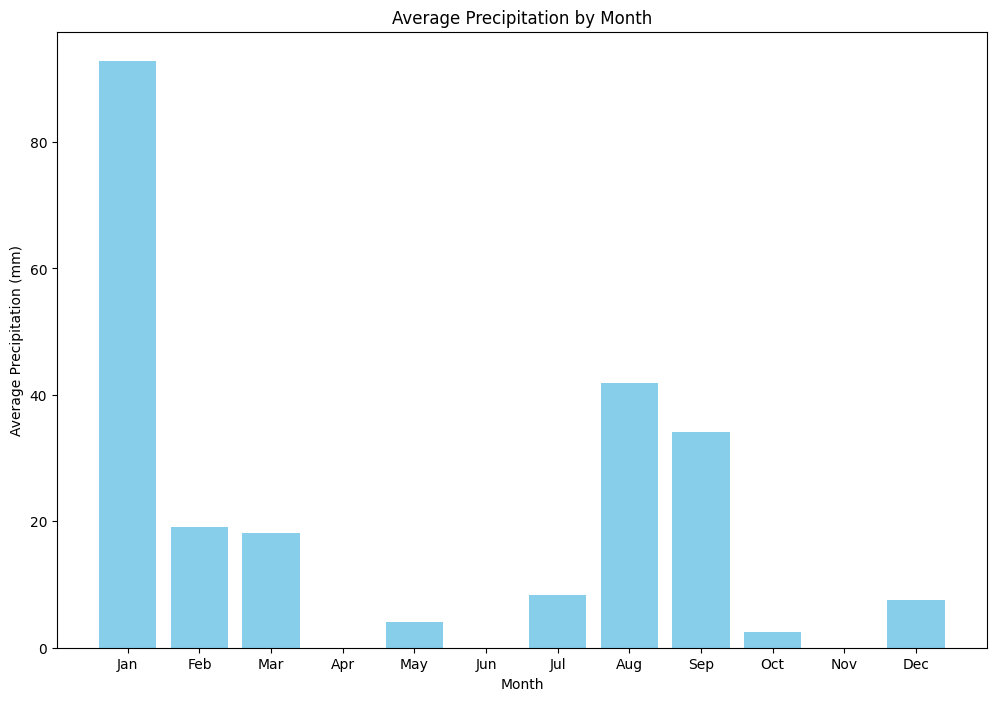

In [45]:
plt.figure(figsize=(12, 8))
plt.bar(climate_df['month'], climate_df['ppt'], color='skyblue')

# Labeling the axes
plt.xlabel('Month')
plt.ylabel('Average Precipitation (mm)')

# Adding a title
plt.title('Average Precipitation by Month')

# Displaying the plot
plt.show()